# Daten von MongoDB direkt laden
Zum Laden der Daten von der MongoDB muss man im HS-VPN sein!
intro in MongoDB-Queries: [click me](https://docs.mongodb.com/manual/tutorial/query-documents/)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pymongo import MongoClient
import mongodb_connection
from datetime import datetime, timedelta
import copy
import importbib

In [2]:
dfX = importbib.loadxAxisDataFromMongoDB(datetime(2019,11,26,12,15), datetime(2019,11,26,13,10))
print(dfX.shape)

(120029, 4)


In [ ]:
dfR = importbib.loadReibdatenFromMongoDB(datetime(2019,1,1,0,0),datetime(2019,12,30,23,59))
dfR.head()
dfR.to_csv("reibdaten_2019.csv", encoding="utf-8", index=False)

In [36]:
#only uncomment for export
#df.to_csv("2019-11-26_export.csv", index=False)

In [2]:
df = pd.read_csv("csv_Files/2019-11-26_export.csv", encoding="utf-8")
df["timeStamp"] = pd.to_datetime(df["timeStamp"])
print(df.dtypes)
print(df.shape)
print(df.iloc[131167])

_id                  object
ValueID              object
value               float64
timeStamp    datetime64[ns]
dtype: object
(131168, 4)
_id                                   5ddd25148e15b3086c07bed5
ValueID      12430012063.Tool_Control_Center.Axial_Force_Co...
value                                                        0
timeStamp                           2019-11-26 13:15:16.601000
Name: 131167, dtype: object


In [3]:
df["ValueID"].value_counts()

12430012063.Main_Spindle.Actual_Position_MCS                    14288
12430012063.Energy_Savings.Active_Power_Spindle1                12396
12430012063.Z1_Axis.Actual_Position_MCS                         11145
12430012063.Tool_Control_Center.Symmetry                         8173
12430012063.Z1_Axis.Actual_Power                                 8024
12430012063.Main_Spindle.Actual_Power                            7700
12430012063.Energy_Savings.Active_Power_Z1                       5724
12430012063.Y1_Axis.Actual_Power                                 5167
12430012063.X1_Axis.Actual_Power                                 4690
12430012063.Tool_Control_Center.Axial_Force_Tension              4643
12430012063.Z1_Axis.Actual_Feed_Rate                             4465
12430012063.X1_Axis.Actual_Position_MCS                          4453
12430012063.Main_Spindle.Actual_Speed_Rate                       4409
12430012063.Y1_Axis.Actual_Position_MCS                          3861
12430012063.X1_Axis.

/home/bueddi/snap/jupyter/common/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


<Figure size 1200x400 with 0 Axes>

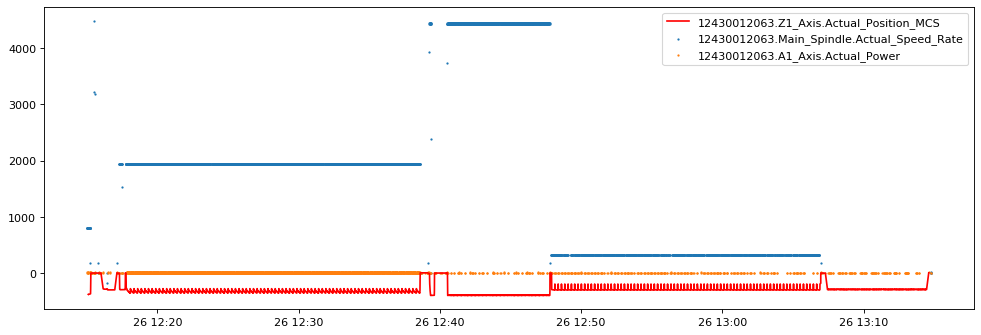

In [4]:
tsStart = datetime(2019,11,26,12,0)
tsEnd = datetime(2019,11,26,23,35)
plt.figure(figsize=(15, 5), dpi=80)

toPlot = ["12430012063.Main_Spindle.Actual_Speed_Rate","12430012063.A1_Axis.Actual_Power"]

# plotSpecificIDs(toPlot)
importbib.plotSpecificIDs(toPlot, df)

In [5]:
df.loc[lambda l: l['ValueID']=="12430012063.Maintenance_Package.Tool_Changer_Main"]

,_id,ValueID,value,timeStamp
575,5ddd17038e15b3086c052b2c,12430012063.Maintenance_Package.Tool_Changer_Main,4997804.0,2019-11-26 12:15:16.454
777,5ddd170f8e15b3086c052c16,12430012063.Maintenance_Package.Tool_Changer_Main,4997803.0,2019-11-26 12:15:27.886
1095,5ddd17258e15b3086c052d7b,12430012063.Maintenance_Package.Tool_Changer_Main,4997802.0,2019-11-26 12:15:50.136
2249,5ddd17758e15b3086c05326e,12430012063.Maintenance_Package.Tool_Changer_Main,4997801.0,2019-11-26 12:17:10.026
2250,5ddd1a3b8e15b3086c05c3f6,12430012063.Maintenance_Package.Tool_Changer_Main,4997801.0,2019-11-26 12:17:10.026
2251,5ddd1c938e15b3086c063b72,12430012063.Maintenance_Package.Tool_Changer_Main,4997801.0,2019-11-26 12:17:10.026
54849,5ddd1c9c8e15b3086c063bcf,12430012063.Maintenance_Package.Tool_Changer_Main,4997800.0,2019-11-26 12:39:09.262
55439,5ddd1cb88e15b3086c063ea0,12430012063.Maintenance_Package.Tool_Changer_Main,4997799.0,2019-11-26 12:39:37.075
55622,5ddd1cc58e15b3086c063f6b,12430012063.Maintenance_Package.Tool_Changer_Main,4997798.0,2019-11-26 12:39:49.774
81271,5ddd1ea28e15b3086c06b044,12430012063.Maintenance_Package.Tool_Changer_Main,4997797.0,2019-11-26 12:47:47.338


Before: 
2019-11-26 13:10:00	-	2019-11-26 13:11:00
-304.59
-284.59
After: 
2019-11-26 13:07:26	-	2019-11-26 13:14:28


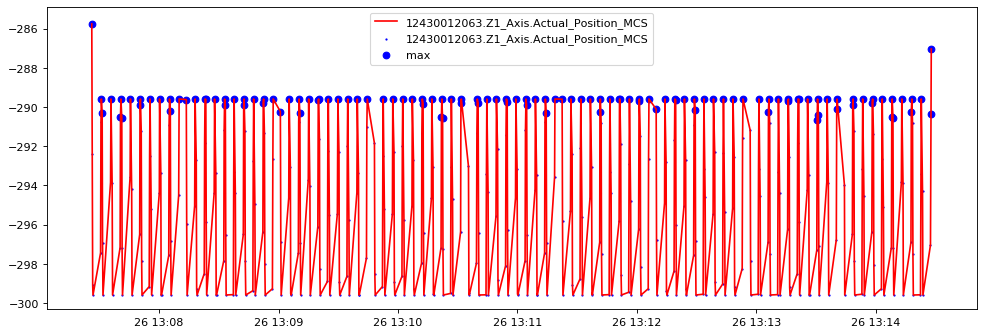

In [6]:
valueID_Z1 = "12430012063.Z1_Axis.Actual_Position_MCS"
startSample = datetime(2019,11,26,13,10)
endSample = datetime(2019,11,26,13,11)

print("Before: ")
print(str(startSample)+"\t-\t"+str(endSample))
#dfFindRange = df.loc[lambda d: (startSample < d["timeStamp"]) & (d["timeStamp"] < endSample)]
#plotActualZ1(dfFindRange)

start,end = importbib.approxRangeInSteps(df,startSample,endSample)
print("After: ")
print(str(start)+"\t-\t"+str(end))
dfFindRange = df.loc[lambda d: (start < d['timeStamp']) & (d['timeStamp'] < end) & (d['ValueID'] == valueID_Z1)]
plt.figure(figsize=(15, 5), dpi=80)
plt.plot(dfFindRange.loc[lambda l: (l['ValueID']=="12430012063.Z1_Axis.Actual_Position_MCS") & (start < l['timeStamp'])& (l['timeStamp'] < end), "timeStamp"],dfFindRange.loc[lambda l: (l['ValueID']=="12430012063.Z1_Axis.Actual_Position_MCS") & (start < l['timeStamp']) & (l['timeStamp'] < end), 'value'], c='r')
plt.scatter(dfFindRange.loc[lambda l: (l['ValueID']=="12430012063.Z1_Axis.Actual_Position_MCS") & (start < l['timeStamp'])& (l['timeStamp'] < end), "timeStamp"],dfFindRange.loc[lambda l: (l['ValueID']=="12430012063.Z1_Axis.Actual_Position_MCS") & (start < l['timeStamp']) & (l['timeStamp'] < end), 'value'], c='b',s=1.0)

top = dfFindRange.loc[lambda l: (l['ValueID']=="12430012063.Z1_Axis.Actual_Position_MCS") & (start < l['timeStamp'])& (l['timeStamp'] < end), "value"].max()
tol = 5
maxToPlot = dfFindRange.loc[lambda l: (l['ValueID']=="12430012063.Z1_Axis.Actual_Position_MCS") & (start < l['timeStamp'])& (l['timeStamp'] < end) & (top-tol < l['value']) & (l['value'] < top+tol),["value","timeStamp"]]
plt.scatter(maxToPlot["timeStamp"], maxToPlot["value"], c='b')

plt.legend(["12430012063.Z1_Axis.Actual_Position_MCS","12430012063.Z1_Axis.Actual_Position_MCS", "max"])
plt.show()

In [7]:
allImportantReibe = dfFindRange.loc[lambda l: (l['ValueID']=="12430012063.Z1_Axis.Actual_Position_MCS") & (start < l['timeStamp']) & (l['timeStamp'] < end), ['value',"timeStamp"]]
print(allImportantReibe.shape)
print(maxToPlot.shape)

(436, 2)
(122, 2)


In [8]:
dfTops1 = []
dfTops2 = []
dfTops1.append(allImportantReibe.iloc[0,0])
dfTops2.append(allImportantReibe.iloc[0,1])
for i in range(1,allImportantReibe.shape[0]-1):
    diff1 = allImportantReibe.iloc[i].loc["value"] - allImportantReibe.iloc[i-1].loc["value"]
    diff2 = allImportantReibe.iloc[i].loc["value"] - allImportantReibe.iloc[i+1].loc["value"]
    
    if diff1 > 0 and diff2 > 0:
        dfTops1.append(allImportantReibe.iloc[i,0])
        dfTops2.append(allImportantReibe.iloc[i,1])

dfTops1.append(allImportantReibe.iloc[-1,0])
dfTops2.append(allImportantReibe.iloc[-1,1])
print(len(dfTops1))
print(dfTops1[0])
print(dfTops2[1])

82
-285.76
2019-11-26 13:07:30.992000


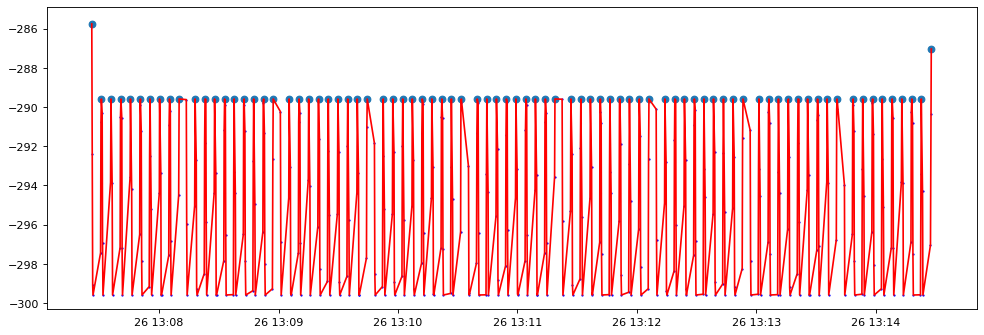

In [9]:
plt.figure(figsize=(15, 5), dpi=80)
plt.plot(dfFindRange.loc[lambda l: (l['ValueID']=="12430012063.Z1_Axis.Actual_Position_MCS") & (start < l['timeStamp'])& (l['timeStamp'] < end), "timeStamp"],dfFindRange.loc[lambda l: (l['ValueID']=="12430012063.Z1_Axis.Actual_Position_MCS") & (start < l['timeStamp']) & (l['timeStamp'] < end), 'value'], c='r')
plt.scatter(dfFindRange.loc[lambda l: (l['ValueID']=="12430012063.Z1_Axis.Actual_Position_MCS") & (start < l['timeStamp'])& (l['timeStamp'] < end), "timeStamp"],dfFindRange.loc[lambda l: (l['ValueID']=="12430012063.Z1_Axis.Actual_Position_MCS") & (start < l['timeStamp']) & (l['timeStamp'] < end), 'value'], c='b',s=1.0)
plt.scatter(dfTops2,dfTops1)
plt.show()

In [10]:
dfTimestamps = pd.DataFrame(zip(dfTops2[:-1],dfTops2[1:]), columns=["start","end"])
print(dfTimestamps.shape)
dfTimestamps.head()

(81, 2)


,start,end
0,2019-11-26 13:07:26.190,2019-11-26 13:07:30.992
1,2019-11-26 13:07:30.992,2019-11-26 13:07:35.830
2,2019-11-26 13:07:35.830,2019-11-26 13:07:40.824
3,2019-11-26 13:07:40.824,2019-11-26 13:07:45.625
4,2019-11-26 13:07:45.625,2019-11-26 13:07:50.628


In [11]:
ls = []
for timeframe in dfTimestamps.iterrows():
    curData = df.loc[lambda l: (timeframe[1]["start"] < l["timeStamp"]) & (l["timeStamp"] < timeframe[1]["end"]),["ValueID", "value", "timeStamp"]]
    curData = curData.groupby(by="ValueID", as_index=False).mean().T
    curData.columns = curData.iloc[0]
    curData.drop(curData.index[0], inplace=True)
    curData["timeStamp"] = timeframe[1]["start"]
    ls.append(curData)
print("\n\n"+str(len(ls)))



81


In [12]:
dfData = pd.concat(ls, ignore_index=True, sort=False)
dfData.sort_values(by=["timeStamp"], inplace=True)
dfData["Label"] = "IO"
print(dfData.shape)
dfData.head()

(81, 24)


,12430012063.A1_Axis.Actual_Power,12430012063.Energy_Savings.Active_Power_X1,12430012063.Energy_Savings.Active_Power_Y1,12430012063.Energy_Savings.Active_Power_Z1,12430012063.Main_Spindle.Actual_Position_MCS,12430012063.Main_Spindle.MPC_Peak,12430012063.Main_Spindle.MPC_Veff_Total,12430012063.Main_Spindle.Temperature_Spindle,12430012063.Tool_Control_Center.Axial_Force_Compression,12430012063.Tool_Control_Center.Axial_Force_Tension,...,12430012063.X1_Axis.Actual_Power,12430012063.Y1_Axis.Actual_Feed_Rate,12430012063.Y1_Axis.Actual_Position_MCS,12430012063.Y1_Axis.Actual_Power,12430012063.Y1_Axis.Temperature_Y_Slide,12430012063.Z1_Axis.Actual_Feed_Rate,12430012063.Z1_Axis.Actual_Position_MCS,12430012063.Z1_Axis.Actual_Power,timeStamp,Label
0,6,9.29347,5.21662,13.8016,0,0.6,0.857143,27.52,0.05,0.05,...,3.21429,-51.9286,-410.568,2.23529,26.745,529,-295.86,13.5385,2019-11-26 13:07:26.190,IO
1,5.5,9.98144,7.96331,7.46017,NaN,0.5,1,NaN,0.0444444,0.0555556,...,3.47059,-11.8125,-410.536,2.06667,NaN,0,-295.165,14.2222,2019-11-26 13:07:30.992,IO
2,5.5,10.3763,6.16515,19.0238,NaN,0.5,1.16667,27.5133,0.05,0.0428571,...,3.88235,-52.7143,-410.544,2.05556,NaN,4.83333,-295.285,12.7,2019-11-26 13:07:35.830,IO
3,5.5,9.23518,6.57613,23.9352,NaN,0.5,0.857143,27.5267,0.05,0.05,...,2.76471,-29.7143,-410.529,3,NaN,434.25,-295.23,14.3,2019-11-26 13:07:40.824,IO
4,5.5,10.1506,6.16515,11.1904,NaN,0.5,0.5,27.52,0.05,0.0533333,...,2.41176,0.642857,-410.54,2.5,26.745,121,-295.035,14,2019-11-26 13:07:45.625,IO


In [45]:
dfData.to_csv("data_2019-26-11_REIB.csv",index=False,encoding="utf-8")